# GitHub Forks and Stars

In addition to understanding organizational affiliation, usage is also important. While it can be difficult or impossible to accurately measure the actual usage of open source projects, there is a strong positive correlation between usage and GitHub forks and stars (Vargas et. al., 2024). 

In this case, these GitHub forks refer to social forks, not hard forks.

## Summary
Excluding the month of the event where the spikes occurred (relicensing event for the original project or announcement date for the hard fork), these are the medians per month for new stars and forks that occurred before and after the relicensing event: 

**Elasticsearch / OpenSearch**
* Elasticsearch Stars: before 643, after 416
* OpenSearch Stars: 156
* Elasticsearch Forks: before 352, after 165
* OpenSearch Forks: 38

**Terraform / OpenTofu**
* Terraform Stars: before 391, after 331
* OpenTofu Stars: 432
* Terraform Forks: before 106, after 75
* OpenTofu Forks: 32

**Redis / Valkey**
* Redis Stars: before 459, after 425
* Valkey Stars: 530
* Redis Forks: before 108, after 93
* Valkey Forks: 29


In [441]:
# Functions used throughout the Notebook

import pandas as pd

def get_data (csv_file, beg, end):
    import pandas as pd
    import matplotlib.pyplot as plt
    
    df = pd.read_csv(csv_file)
    
    df['mon'] = df.mon.map('{:02}'.format).astype(str)
    df['yr-mon'] = df['yr'].astype(str) + '-' + df['mon'].astype(str)
    
    df.drop(['yr', 'mon', 'd'], axis=1, inplace=True)
    
    df_sub = df[df['yr-mon'].between(beg, end)]
    
    return df_sub

def get_stats (df, metric, beg, end, rel_before, rel_after):
    
    # Note: This excludes the month where the relicensing event or fork launch happened
    
    at = df.groupby('yr-mon').sum()
    print('Full timeframe:', beg, 'to', end, '\n')
    print('Median:', at[metric].median(), '\n')
    print(at.describe())
    at['yr-mon'] = at.index

    if rel_before != '0':
        bef = at[at['yr-mon'].between(beg, rel_before)]
        print('\nBefore event', beg, 'to', rel_before, '\n')
        print('Median:', bef[metric].median(), '\n')
        print(bef)
        print(bef.describe())

    aft = at[at['yr-mon'].between(rel_after, end)]
    print('\nAfter event', rel_after, 'to', end, '\n')
    print('Median:', aft[metric].median(), '\n')
    print(aft)
    print(aft.describe())

# Elasticsearch

Key dates:
* Relicense: 2021-02-03
* Adding AGPL: 2024-08-29

Note about GHArchive outage in 2021-10 https://github.com/igrigorik/gharchive.org/issues/261

In [416]:
beg = '2020-02'
end = '2025-03'

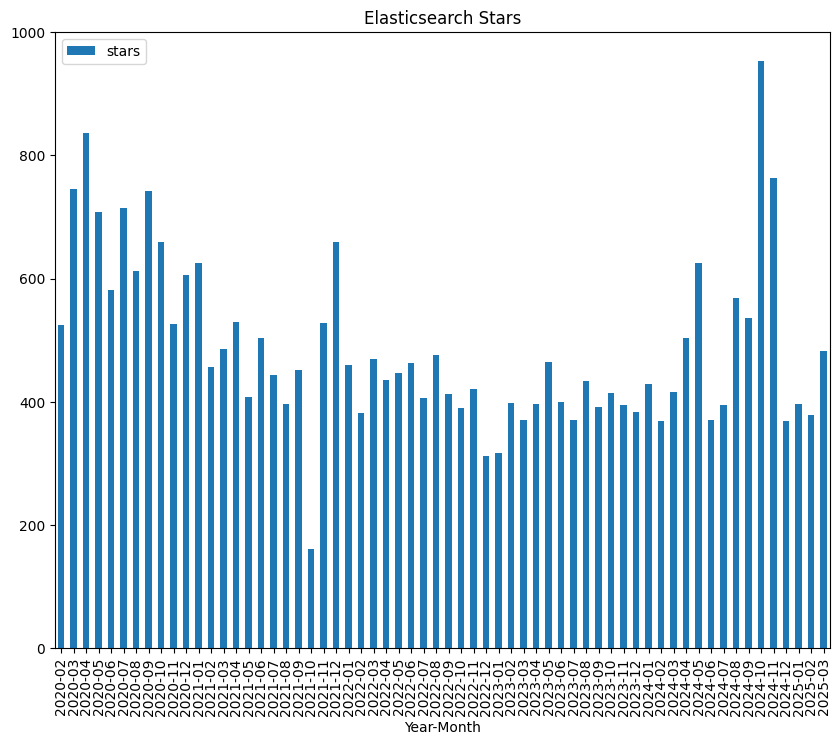

In [417]:
elasticsearch_stars = get_data('../data-files/stars-forks/elasticsearch_stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
plot = elasticsearch_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Elasticsearch Stars', xlabel='Year-Month')

In [418]:
get_stats (elasticsearch_stars, 'stars', beg, end, '2021-01', '2021-03')

Full timeframe: 2020-02 to 2025-03 

Median: 449.0 

            stars
count   62.000000
mean   488.258065
std    140.086266
min    160.000000
25%    396.250000
50%    449.000000
75%    534.500000
max    953.000000

Before event 2020-02 to 2021-01 

Median: 643.0 

         stars   yr-mon
yr-mon                 
2020-02    525  2020-02
2020-03    745  2020-03
2020-04    837  2020-04
2020-05    709  2020-05
2020-06    582  2020-06
2020-07    714  2020-07
2020-08    613  2020-08
2020-09    743  2020-09
2020-10    660  2020-10
2020-11    527  2020-11
2020-12    606  2020-12
2021-01    626  2021-01
            stars
count   12.000000
mean   657.250000
std     94.843531
min    525.000000
25%    600.000000
50%    643.000000
75%    721.250000
max    837.000000

After event 2021-03 to 2025-03 

Median: 416.0 

         stars   yr-mon
yr-mon                 
2021-03    485  2021-03
2021-04    530  2021-04
2021-05    408  2021-05
2021-06    504  2021-06
2021-07    444  2021-07
2021-08    397  20

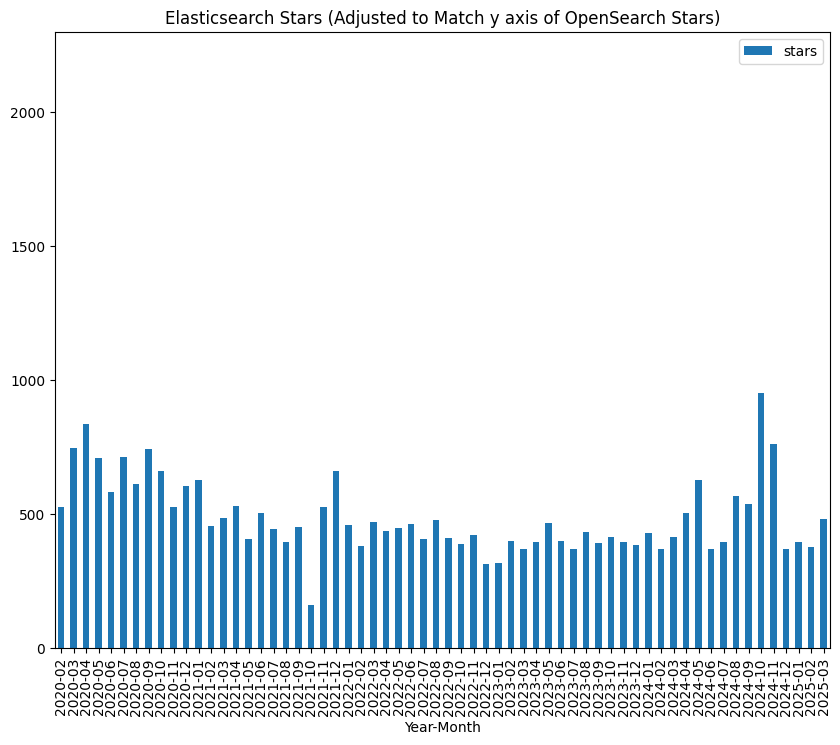

In [419]:
# Adjusted to Match y axis of OpenSearch Stars
elasticsearch_stars = get_data('../data-files/stars-forks/elasticsearch_stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 2300])
plot = elasticsearch_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Elasticsearch Stars (Adjusted to Match y axis of OpenSearch Stars)', xlabel='Year-Month')

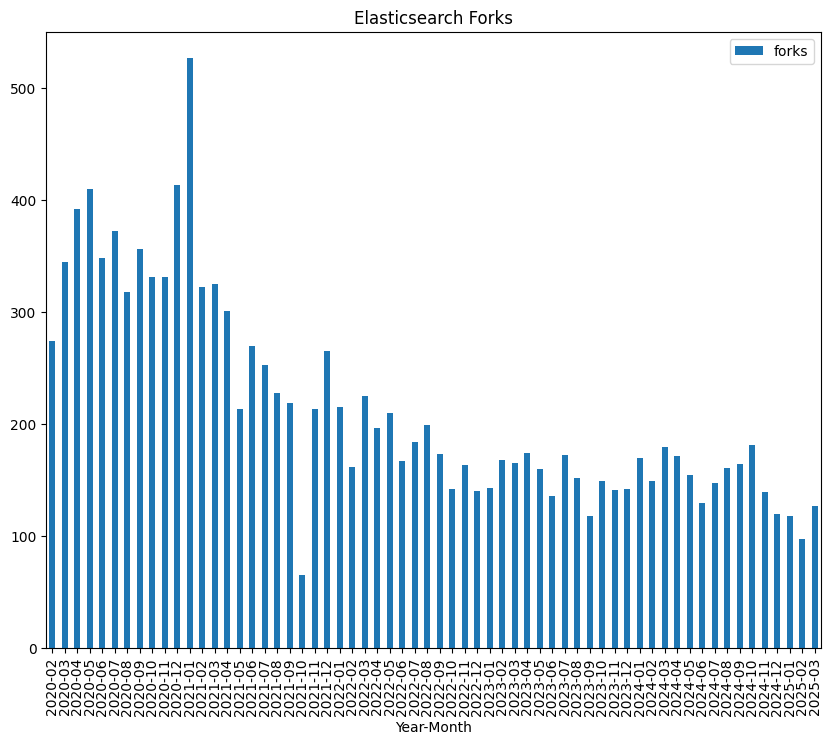

In [420]:
elasticsearch_forks = get_data('../data-files/stars-forks/elasticsearch_forks.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 550])
plot = elasticsearch_forks.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Elasticsearch Forks', xlabel='Year-Month')

In [421]:
get_stats (elasticsearch_forks, 'forks', beg, end, '2021-01', '2021-03')

Full timeframe: 2020-02 to 2025-03 

Median: 173.5 

            forks
count   62.000000
mean   214.403226
std     93.911270
min     65.000000
25%    149.000000
50%    173.500000
75%    268.750000
max    527.000000

Before event 2020-02 to 2021-01 

Median: 352.0 

         forks   yr-mon
yr-mon                 
2020-02    274  2020-02
2020-03    345  2020-03
2020-04    392  2020-04
2020-05    410  2020-05
2020-06    348  2020-06
2020-07    372  2020-07
2020-08    318  2020-08
2020-09    356  2020-09
2020-10    331  2020-10
2020-11    331  2020-11
2020-12    413  2020-12
2021-01    527  2021-01
            forks
count   12.000000
mean   368.083333
std     63.824273
min    274.000000
25%    331.000000
50%    352.000000
75%    396.500000
max    527.000000

After event 2021-03 to 2025-03 

Median: 165.0 

         forks   yr-mon
yr-mon                 
2021-03    325  2021-03
2021-04    301  2021-04
2021-05    213  2021-05
2021-06    270  2021-06
2021-07    253  2021-07
2021-08    228  20

# OpenSearch

Key Dates:
* Fork Announced: 2021-04-12
* Move to LF: 2024-09-16

In [435]:
beg = '2021-04'
end = '2025-03'

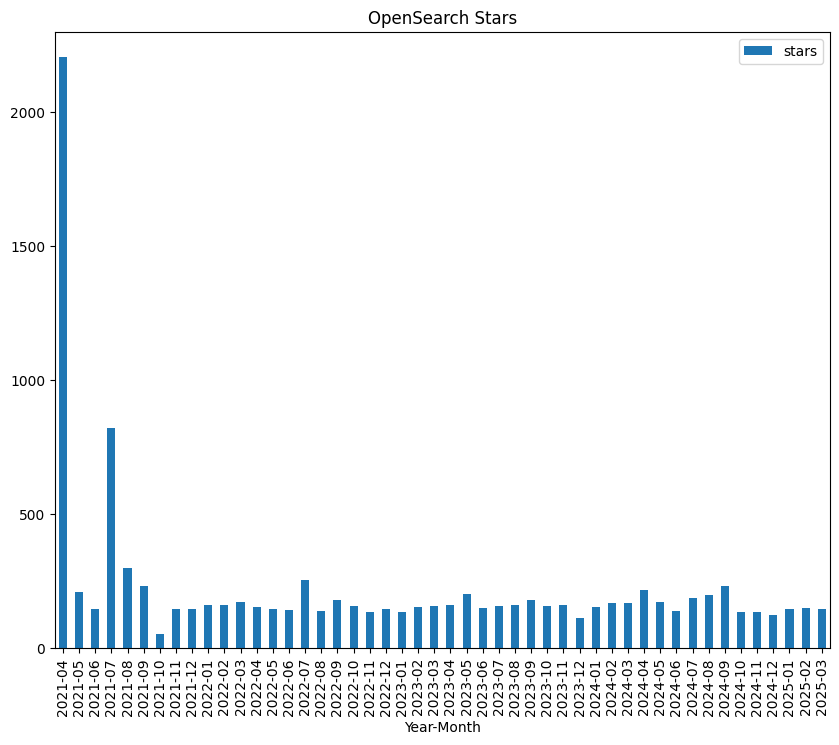

In [436]:
opensearch_stars = get_data('../data-files/stars-forks/opensearch-stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 2300])
plot = opensearch_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='OpenSearch Stars', xlabel='Year-Month')

In [440]:
get_stats (opensearch_stars, 'stars', beg, end, '0', '2021-05')

Full timeframe: 2021-04 to 2025-03 

Median: 156.0 

             stars
count    48.000000
mean    219.666667
std     310.081824
min      54.000000
25%     145.000000
50%     156.000000
75%     178.250000
max    2205.000000

After event 2021-05 to 2025-03 

Median: 156.0 

         stars   yr-mon
yr-mon                 
2021-05    208  2021-05
2021-06    147  2021-06
2021-07    822  2021-07
2021-08    298  2021-08
2021-09    232  2021-09
2021-10     54  2021-10
2021-11    145  2021-11
2021-12    147  2021-12
2022-01    162  2022-01
2022-02    160  2022-02
2022-03    172  2022-03
2022-04    154  2022-04
2022-05    145  2022-05
2022-06    143  2022-06
2022-07    255  2022-07
2022-08    139  2022-08
2022-09    179  2022-09
2022-10    156  2022-10
2022-11    136  2022-11
2022-12    145  2022-12
2023-01    135  2023-01
2023-02    154  2023-02
2023-03    156  2023-03
2023-04    159  2023-04
2023-05    203  2023-05
2023-06    149  2023-06
2023-07    155  2023-07
2023-08    162  2023-08
2023-0

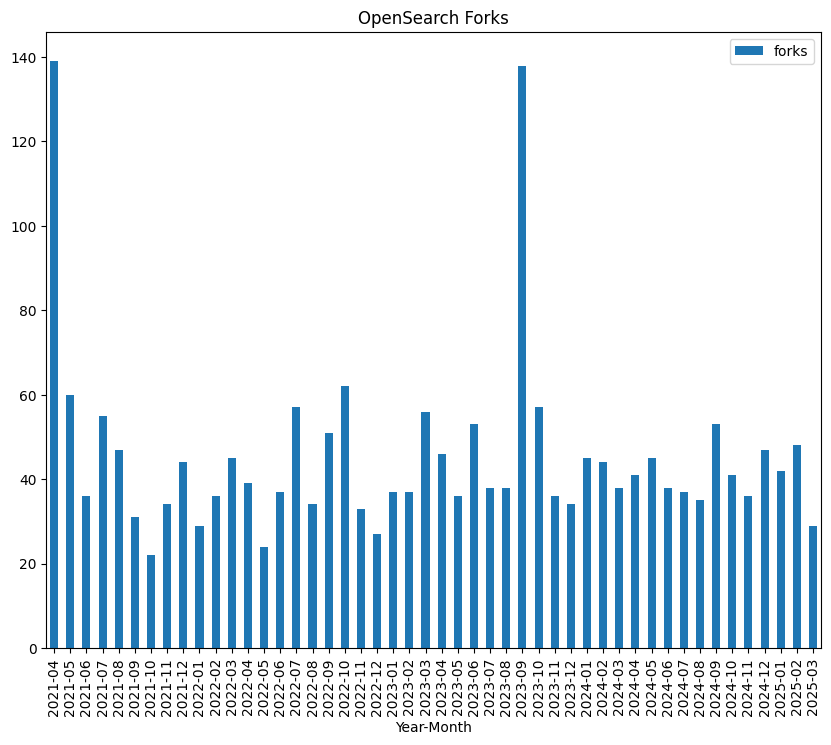

In [438]:
opensearch_forks = get_data('../data-files/stars-forks/opensearch_forks.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
plot = opensearch_forks.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='OpenSearch Forks', xlabel='Year-Month')

In [439]:
get_stats (opensearch_forks, 'forks', beg, end, '0', '2021-05')

Full timeframe: 2021-04 to 2025-03 

Median: 38.5 

            forks
count   48.000000
mean    45.145833
std     21.750020
min     22.000000
25%     36.000000
50%     38.500000
75%     47.250000
max    139.000000

After event 2021-05 to 2025-03 

Median: 38.0 

         forks   yr-mon
yr-mon                 
2021-05     60  2021-05
2021-06     36  2021-06
2021-07     55  2021-07
2021-08     47  2021-08
2021-09     31  2021-09
2021-10     22  2021-10
2021-11     34  2021-11
2021-12     44  2021-12
2022-01     29  2022-01
2022-02     36  2022-02
2022-03     45  2022-03
2022-04     39  2022-04
2022-05     24  2022-05
2022-06     37  2022-06
2022-07     57  2022-07
2022-08     34  2022-08
2022-09     51  2022-09
2022-10     62  2022-10
2022-11     33  2022-11
2022-12     27  2022-12
2023-01     37  2023-01
2023-02     37  2023-02
2023-03     56  2023-03
2023-04     46  2023-04
2023-05     36  2023-05
2023-06     53  2023-06
2023-07     38  2023-07
2023-08     38  2023-08
2023-09    138  2

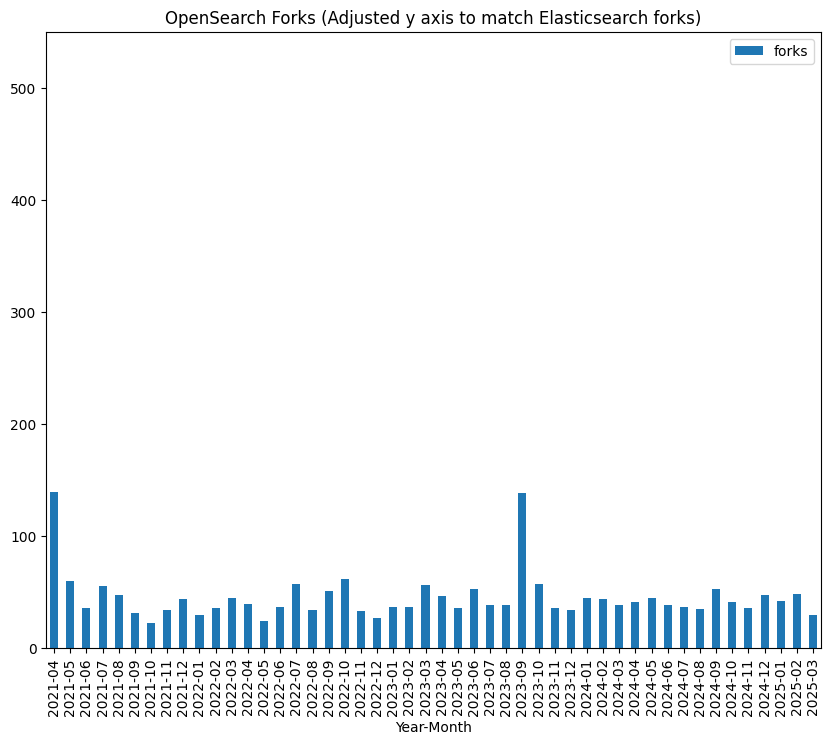

In [425]:
# Adjusted y axis to match Elasticsearch forks
opensearch_forks = get_data('../data-files/stars-forks/opensearch_forks.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 550])
plot = opensearch_forks.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='OpenSearch Forks (Adjusted y axis to match Elasticsearch forks)', xlabel='Year-Month')

# Terraform

Key Dates:
* Relicense: 2023-08-10

In [405]:
beg = '2022-08'
end = '2025-03'

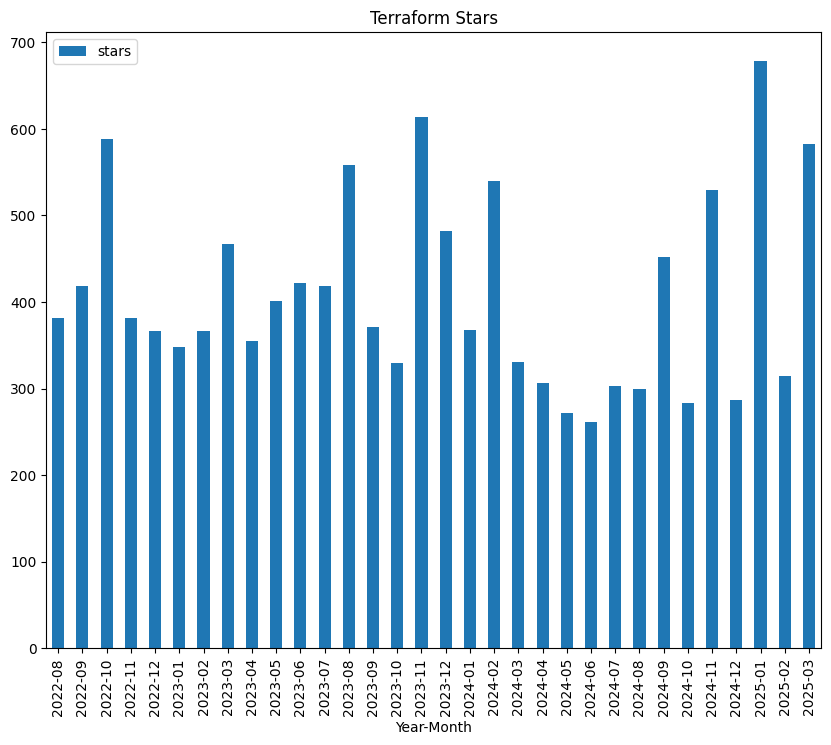

In [406]:
terraform_stars = get_data('../data-files/stars-forks/terraform-stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
plot = terraform_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Terraform Stars', xlabel='Year-Month')

In [407]:
get_stats (terraform_stars, 'stars', beg, end, '2023-07', '2023-09')

Full timeframe: 2022-08 to 2025-03 

Median: 376.0 

            stars
count   32.000000
mean   408.593750
std    111.102934
min    261.000000
25%    326.250000
50%    376.000000
75%    470.750000
max    678.000000

Before event 2022-08 to 2023-07 

Median: 391.0 

         stars   yr-mon
yr-mon                 
2022-08    381  2022-08
2022-09    418  2022-09
2022-10    588  2022-10
2022-11    381  2022-11
2022-12    367  2022-12
2023-01    348  2023-01
2023-02    366  2023-02
2023-03    467  2023-03
2023-04    355  2023-04
2023-05    401  2023-05
2023-06    422  2023-06
2023-07    418  2023-07
            stars
count   12.000000
mean   409.333333
std     65.793525
min    348.000000
25%    366.750000
50%    391.000000
75%    419.000000
max    588.000000

After event 2023-09 to 2025-03 

Median: 331.0 

         stars   yr-mon
yr-mon                 
2023-09    371  2023-09
2023-10    330  2023-10
2023-11    614  2023-11
2023-12    482  2023-12
2024-01    368  2024-01
2024-02    540  20

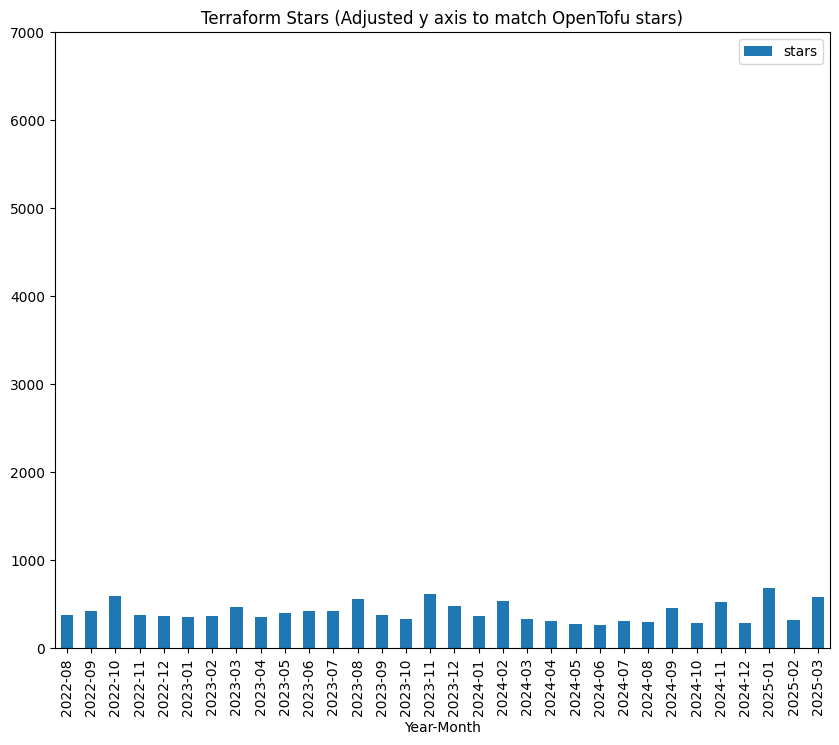

In [408]:
# Adjusted y axis to match OpenTofu stars
terraform_stars = get_data('../data-files/stars-forks/terraform-stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 7000])
plot = terraform_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Terraform Stars (Adjusted y axis to match OpenTofu stars)', xlabel='Year-Month')

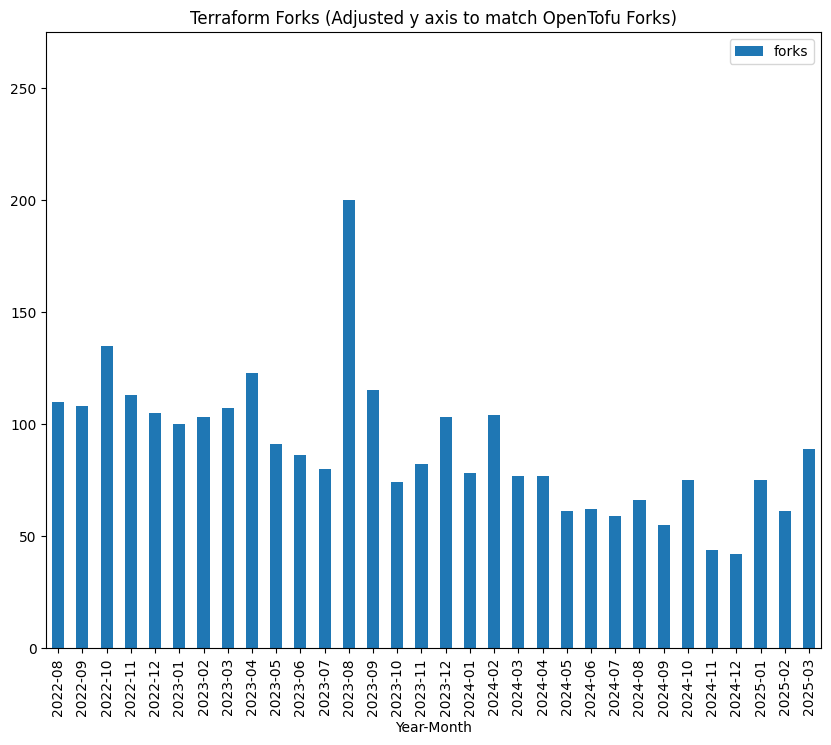

In [409]:
terraform_forks = get_data('../data-files/stars-forks/terraform-forks.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 275])
plot = terraform_forks.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Terraform Forks (Adjusted y axis to match OpenTofu Forks)', xlabel='Year-Month')

In [410]:
get_stats (terraform_forks, 'forks', beg, end, '2023-07', '2023-09')

Full timeframe: 2022-08 to 2025-03 

Median: 84.0 

           forks
count   32.00000
mean    89.37500
std     30.71487
min     42.00000
25%     72.00000
50%     84.00000
75%    105.50000
max    200.00000

Before event 2022-08 to 2023-07 

Median: 106.0 

         forks   yr-mon
yr-mon                 
2022-08    110  2022-08
2022-09    108  2022-09
2022-10    135  2022-10
2022-11    113  2022-11
2022-12    105  2022-12
2023-01    100  2023-01
2023-02    103  2023-02
2023-03    107  2023-03
2023-04    123  2023-04
2023-05     91  2023-05
2023-06     86  2023-06
2023-07     80  2023-07
            forks
count   12.000000
mean   105.083333
std     15.186467
min     80.000000
25%     97.750000
50%    106.000000
75%    110.750000
max    135.000000

After event 2023-09 to 2025-03 

Median: 75.0 

         forks   yr-mon
yr-mon                 
2023-09    115  2023-09
2023-10     74  2023-10
2023-11     82  2023-11
2023-12    103  2023-12
2024-01     78  2024-01
2024-02    104  2024-02
2024-

# OpenTofu

Key dates:
* Fork Announced: 2023-09-05

In [411]:
beg = '2022-09'
end = '2025-03'

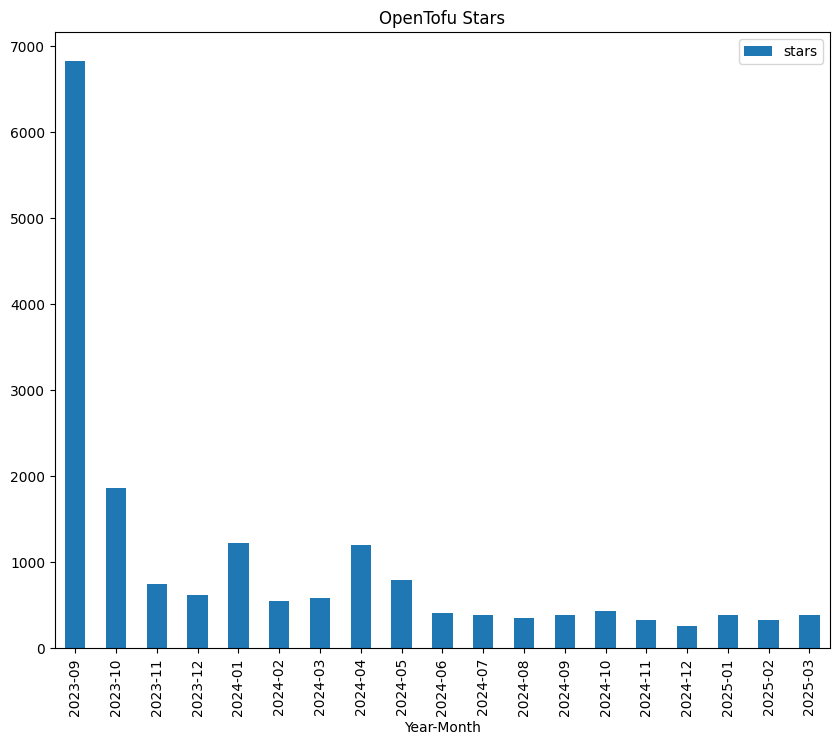

In [412]:
opentofu_stars = get_data('../data-files/stars-forks/opentofu-stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
plot = opentofu_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='OpenTofu Stars', xlabel='Year-Month')

In [413]:
get_stats (opentofu_stars, 'stars', beg, end, '0', '2023-09')

Full timeframe: 2022-09 to 2025-03 

Median: 432.0 

             stars
count    19.000000
mean    949.315789
std    1480.009236
min     262.000000
25%     381.000000
50%     432.000000
75%     770.500000
max    6826.000000

After event 2023-09 to 2025-03 

Median: 432.0 

         stars   yr-mon
yr-mon                 
2023-09   6826  2023-09
2023-10   1861  2023-10
2023-11    751  2023-11
2023-12    619  2023-12
2024-01   1225  2024-01
2024-02    544  2024-02
2024-03    579  2024-03
2024-04   1201  2024-04
2024-05    790  2024-05
2024-06    410  2024-06
2024-07    384  2024-07
2024-08    353  2024-08
2024-09    382  2024-09
2024-10    432  2024-10
2024-11    328  2024-11
2024-12    262  2024-12
2025-01    387  2025-01
2025-02    323  2025-02
2025-03    380  2025-03
             stars
count    19.000000
mean    949.315789
std    1480.009236
min     262.000000
25%     381.000000
50%     432.000000
75%     770.500000
max    6826.000000


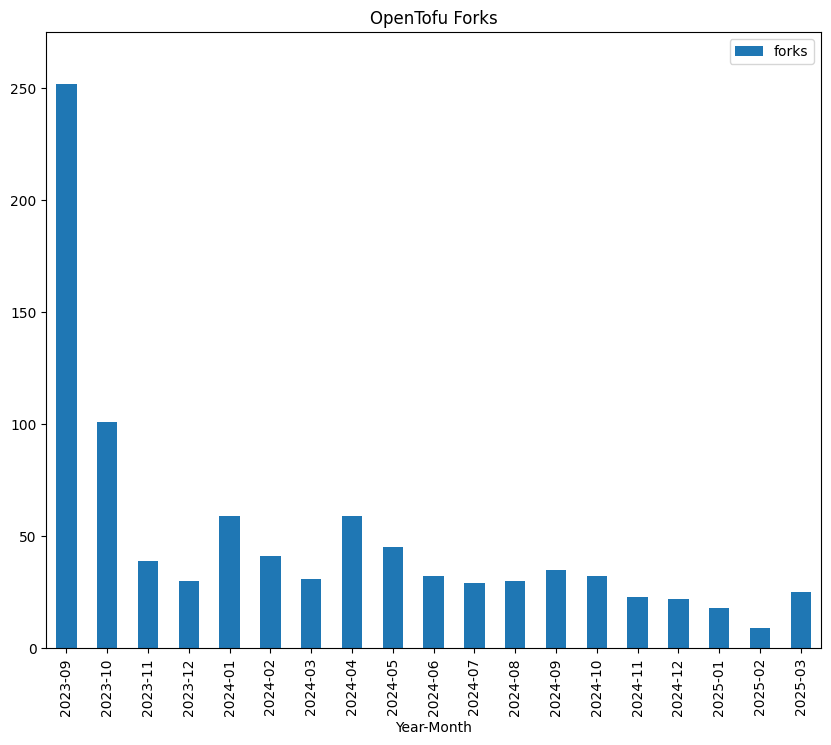

In [414]:
opentofu_forks = get_data('../data-files/stars-forks/opentofu-forks.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 275])
plot = opentofu_forks.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='OpenTofu Forks', xlabel='Year-Month')

In [415]:
get_stats (opentofu_forks, 'forks', beg, end, '0', '2023-09')

Full timeframe: 2022-09 to 2025-03 

Median: 32.0 

            forks
count   19.000000
mean    48.000000
std     53.247848
min      9.000000
25%     27.000000
50%     32.000000
75%     43.000000
max    252.000000

After event 2023-09 to 2025-03 

Median: 32.0 

         forks   yr-mon
yr-mon                 
2023-09    252  2023-09
2023-10    101  2023-10
2023-11     39  2023-11
2023-12     30  2023-12
2024-01     59  2024-01
2024-02     41  2024-02
2024-03     31  2024-03
2024-04     59  2024-04
2024-05     45  2024-05
2024-06     32  2024-06
2024-07     29  2024-07
2024-08     30  2024-08
2024-09     35  2024-09
2024-10     32  2024-10
2024-11     23  2024-11
2024-12     22  2024-12
2025-01     18  2025-01
2025-02      9  2025-02
2025-03     25  2025-03
            forks
count   19.000000
mean    48.000000
std     53.247848
min      9.000000
25%     27.000000
50%     32.000000
75%     43.000000
max    252.000000


# Redis

Key dates:
* March 20, 2024 - Redis relicense

In [394]:
beg = '2023-03'
end = '2025-03'

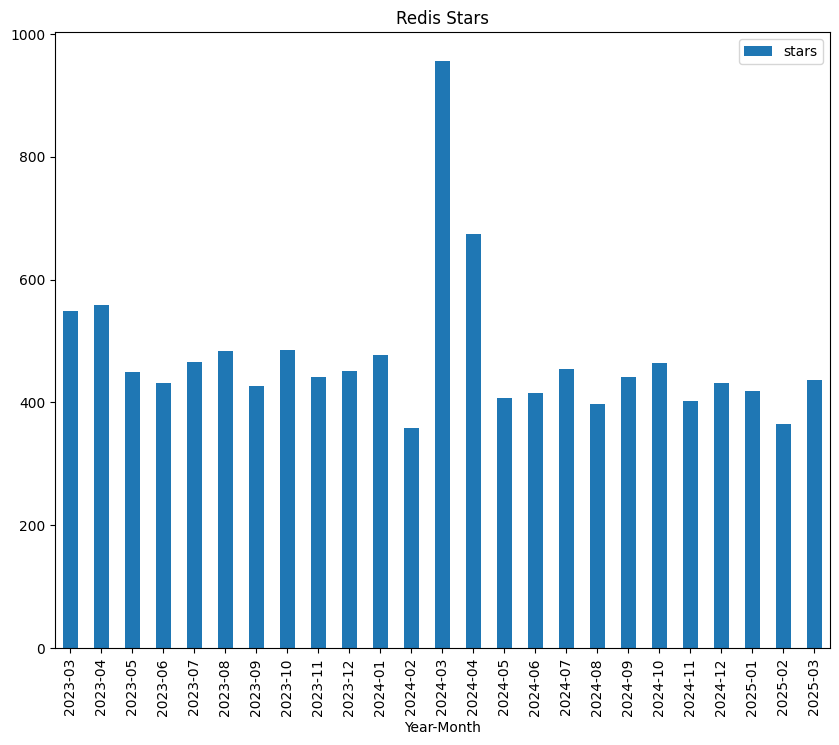

In [397]:
redis_stars = get_data('../data-files/stars-forks/redis-stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
plot = redis_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Redis Stars', xlabel='Year-Month')

In [398]:
get_stats (redis_stars, 'stars', beg, end, '2024-02', '2024-04')

Full timeframe: 2023-03 to 2025-03 

Median: 442.0 

            stars
count   25.000000
mean   473.520000
std    119.461333
min    358.000000
25%    418.000000
50%    442.000000
75%    477.000000
max    955.000000

Before event 2023-03 to 2024-02 

Median: 458.5 

         stars   yr-mon
yr-mon                 
2023-03    548  2023-03
2023-04    558  2023-04
2023-05    450  2023-05
2023-06    432  2023-06
2023-07    466  2023-07
2023-08    483  2023-08
2023-09    426  2023-09
2023-10    485  2023-10
2023-11    442  2023-11
2023-12    451  2023-12
2024-01    477  2024-01
2024-02    358  2024-02
            stars
count   12.000000
mean   464.666667
std     53.440423
min    358.000000
25%    439.500000
50%    458.500000
75%    483.500000
max    558.000000

After event 2024-04 to 2025-03 

Median: 424.5 

         stars   yr-mon
yr-mon                 
2024-04    674  2024-04
2024-05    407  2024-05
2024-06    415  2024-06
2024-07    454  2024-07
2024-08    398  2024-08
2024-09    442  20

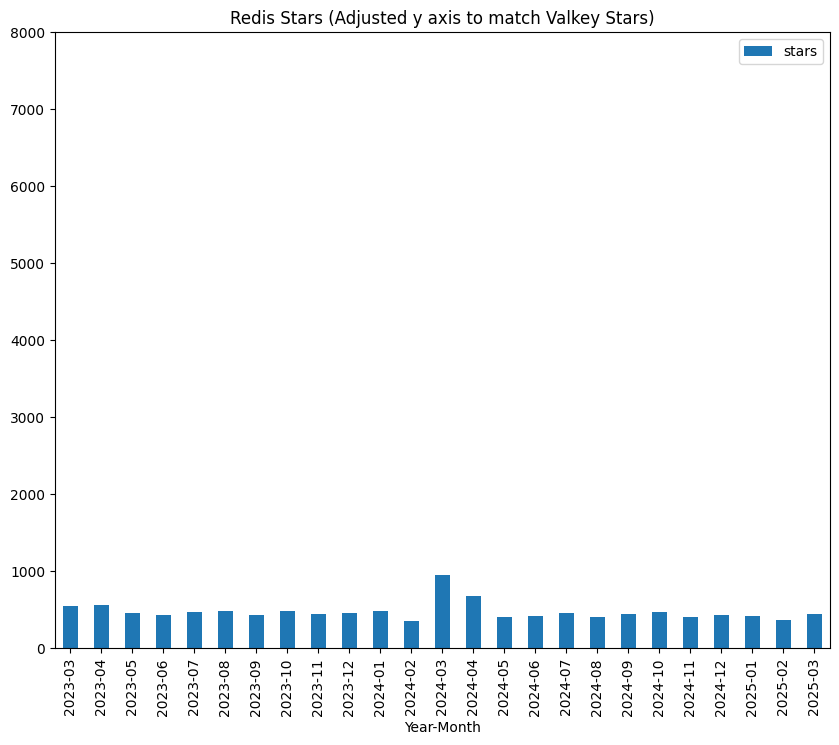

In [399]:
# Adjusted y axis to match Valkey Stars

redis_stars = get_data('../data-files/stars-forks/redis-stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 8000])
plot = redis_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Redis Stars (Adjusted y axis to match Valkey Stars)', xlabel='Year-Month')

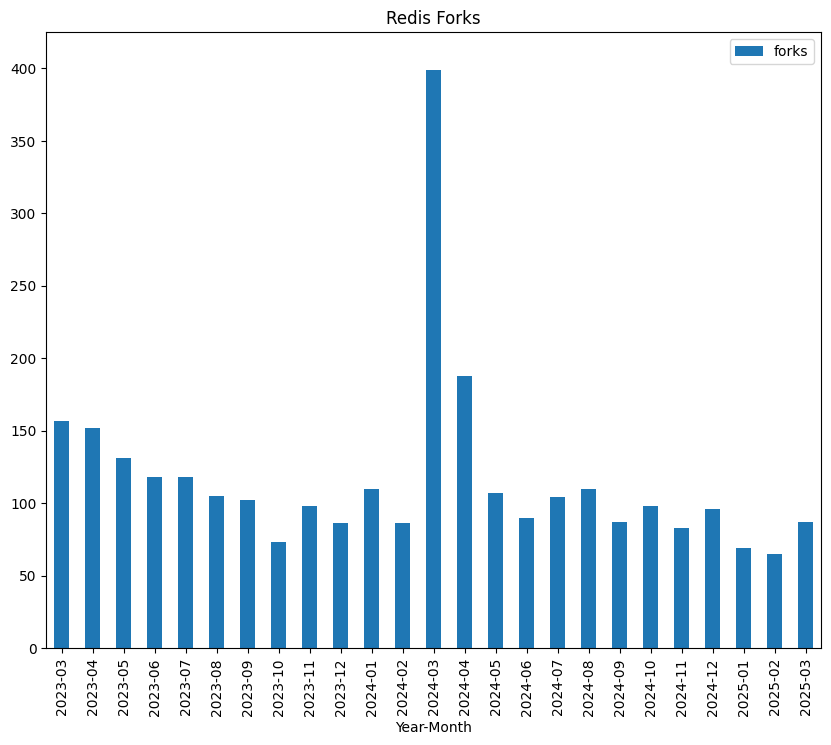

In [395]:
redis_forks = get_data('../data-files/stars-forks/redis-forks.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 425])
plot = redis_forks.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Redis Forks', xlabel='Year-Month')

In [396]:
get_stats (redis_forks, 'forks', beg, end, '2024-02', '2024-04')

Full timeframe: 2023-03 to 2025-03 

Median: 102.0 

            forks
count   25.000000
mean   116.760000
std     65.203706
min     65.000000
25%     87.000000
50%    102.000000
75%    118.000000
max    399.000000

Before event 2023-03 to 2024-02 

Median: 107.5 

         forks   yr-mon
yr-mon                 
2023-03    157  2023-03
2023-04    152  2023-04
2023-05    131  2023-05
2023-06    118  2023-06
2023-07    118  2023-07
2023-08    105  2023-08
2023-09    102  2023-09
2023-10     73  2023-10
2023-11     98  2023-11
2023-12     86  2023-12
2024-01    110  2024-01
2024-02     86  2024-02
            forks
count   12.000000
mean   111.333333
std     25.716402
min     73.000000
25%     95.000000
50%    107.500000
75%    121.250000
max    157.000000

After event 2024-04 to 2025-03 

Median: 93.0 

         forks   yr-mon
yr-mon                 
2024-04    188  2024-04
2024-05    107  2024-05
2024-06     90  2024-06
2024-07    104  2024-07
2024-08    110  2024-08
2024-09     87  202

# Valkey

* Fork Announced: March 28, 2024

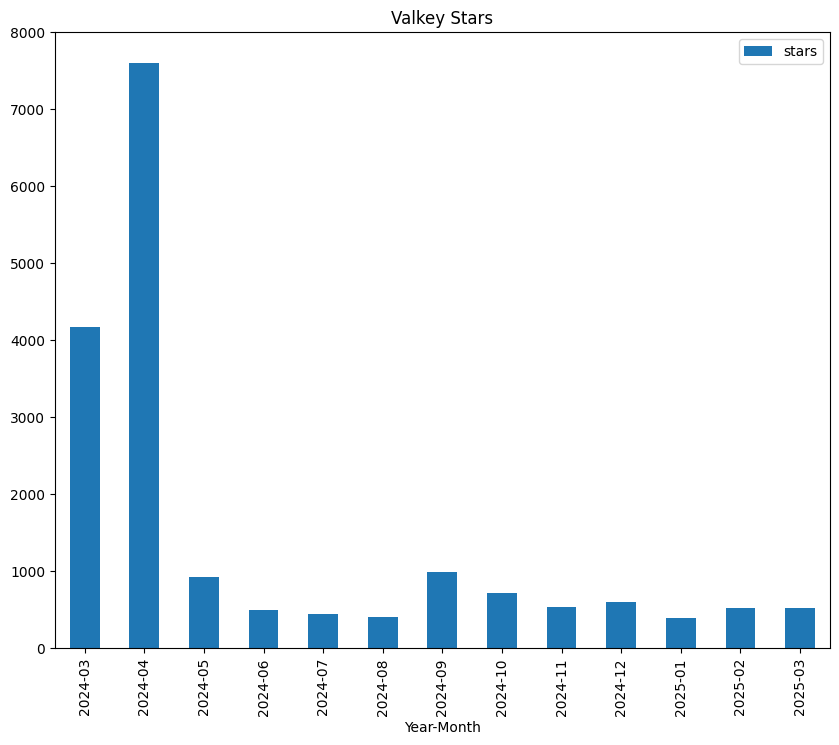

In [403]:
valkey_stars = get_data('../data-files/stars-forks/valkey-stars.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 8000])
plot = valkey_stars.groupby('yr-mon').sum().plot(kind='bar', ax=ax, title='Valkey Stars', xlabel='Year-Month')

In [404]:
get_stats (valkey_stars, 'stars', beg, end, '0', '2024-04')

Full timeframe: 2023-03 to 2025-03 

Median: 540.0 

             stars
count    13.000000
mean   1406.846154
std    2114.323999
min     388.000000
25%     489.000000
50%     540.000000
75%     927.000000
max    7595.000000

After event 2024-04 to 2025-03 

Median: 529.5 

         stars   yr-mon
yr-mon                 
2024-04   7595  2024-04
2024-05    927  2024-05
2024-06    489  2024-06
2024-07    441  2024-07
2024-08    402  2024-08
2024-09    991  2024-09
2024-10    710  2024-10
2024-11    540  2024-11
2024-12    599  2024-12
2025-01    388  2025-01
2025-02    519  2025-02
2025-03    515  2025-03
             stars
count    12.000000
mean   1176.333333
std    2030.565319
min     388.000000
25%     477.000000
50%     529.500000
75%     764.250000
max    7595.000000


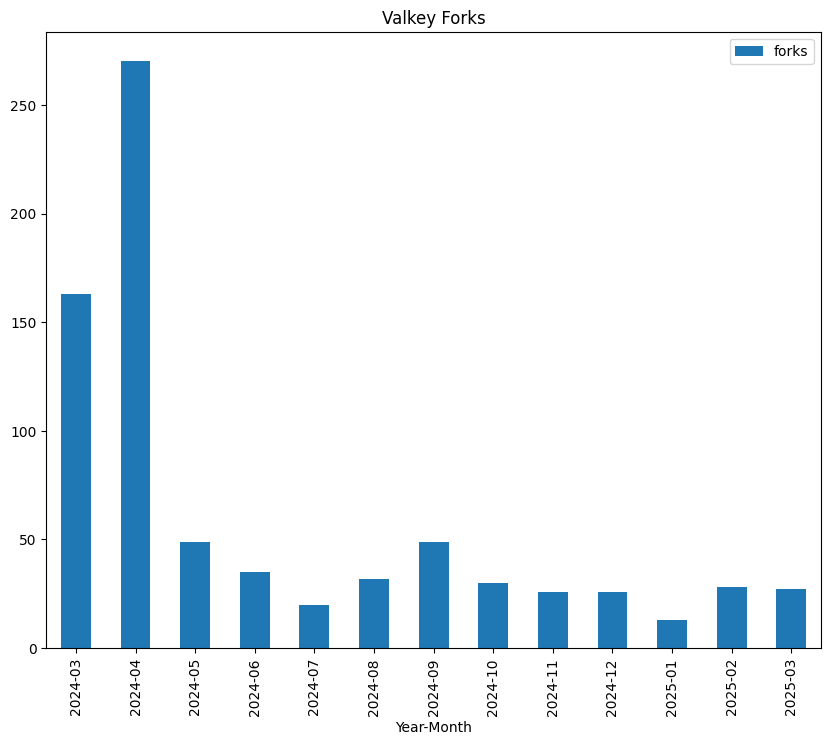

In [400]:
valkey_forks = get_data('../data-files/stars-forks/valkey-forks.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
plot = valkey_forks.groupby('yr-mon').sum().plot(kind='bar', ax=ax, xlabel='Year-Month', title='Valkey Forks')

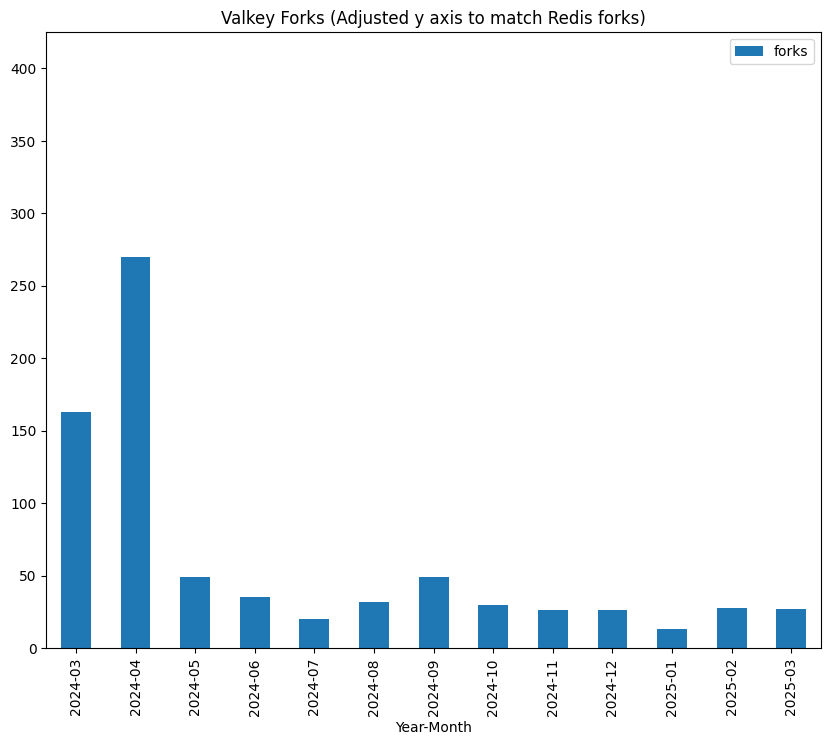

In [401]:
# Adjusted y axis to match Redis forks

valkey_forks = get_data('../data-files/stars-forks/valkey-forks.csv', beg, end)

fig, ax = plt.subplots(figsize=(10,8))
ax.set_ylim([0, 425])
plot = valkey_forks.groupby('yr-mon').sum().plot(kind='bar', ax=ax, xlabel='Year-Month', title='Valkey Forks (Adjusted y axis to match Redis forks)')

In [402]:
get_stats (valkey_forks, 'forks', beg, end, '0', '2024-04')

Full timeframe: 2023-03 to 2025-03 

Median: 30.0 

            forks
count   13.000000
mean    59.076923
std     73.870903
min     13.000000
25%     26.000000
50%     30.000000
75%     49.000000
max    270.000000

After event 2024-04 to 2025-03 

Median: 29.0 

         forks   yr-mon
yr-mon                 
2024-04    270  2024-04
2024-05     49  2024-05
2024-06     35  2024-06
2024-07     20  2024-07
2024-08     32  2024-08
2024-09     49  2024-09
2024-10     30  2024-10
2024-11     26  2024-11
2024-12     26  2024-12
2025-01     13  2025-01
2025-02     28  2025-02
2025-03     27  2025-03
            forks
count   12.000000
mean    50.416667
std     69.923931
min     13.000000
25%     26.000000
50%     29.000000
75%     38.500000
max    270.000000


# Investigation of Spikes

## OpenSearch Fork Spike in 2023-09

Not explained

In [426]:
df = pd.read_csv('../data-files/stars-forks/opensearch_forks.csv')

df_2023 = df.loc[df['yr'] == 2023]

df_2023_9 = df_2023.loc[df_2023['mon'] == 9]

df_2023_9

# Note: 2.10 Release on Sept 25 doesn't really explain the spike on Sept 22-23

,yr,mon,d,forks
591,2023,9,1,1
592,2023,9,3,1
593,2023,9,4,2
594,2023,9,5,4
595,2023,9,7,3
596,2023,9,11,2
597,2023,9,13,1
598,2023,9,14,2
599,2023,9,15,1
600,2023,9,16,1


## Terraform Star Spikes

The spikes seem to correspond to Terraform release dates

In [427]:
terraform_stars = get_data('../data-files/stars-forks/terraform-stars.csv', '2022-08', '2025-03')

In [428]:
df = pd.read_csv('../data-files/stars-forks/terraform-stars.csv')

df_2024 = df.loc[df['yr'] == 2024]

df_2024_11 = df_2024.loc[df_2024['mon'] == 11]

df_2024_11

# Note: Release 1.10.0 (November 27, 2024)

,yr,mon,d,stars
1751,2024,11,1,11
1752,2024,11,2,8
1753,2024,11,3,9
1754,2024,11,4,9
1755,2024,11,5,11
1756,2024,11,6,14
1757,2024,11,7,12
1758,2024,11,8,7
1759,2024,11,9,5
1760,2024,11,10,11


In [429]:
df_2024_9 = df_2024.loc[df_2024['mon'] == 9]

df_2024_9

# Note: Release 1.10.0-alpha20240911 (September 11, 2024)

,yr,mon,d,stars
1690,2024,9,1,7
1691,2024,9,2,10
1692,2024,9,3,7
1693,2024,9,4,9
1694,2024,9,5,15
1695,2024,9,6,13
1696,2024,9,7,14
1697,2024,9,8,12
1698,2024,9,9,20
1699,2024,9,10,28


In [430]:
df_2025 = df.loc[df['yr'] == 2025]

df_2025_1 = df_2025.loc[df_2025['mon'] == 1]

df_2025_1

# Note: Release Jan 16 1.11.0-beta1

,yr,mon,d,stars
1812,2025,1,1,3
1813,2025,1,2,20
1814,2025,1,3,60
1815,2025,1,4,50
1816,2025,1,5,10
1817,2025,1,6,11
1818,2025,1,7,10
1819,2025,1,8,8
1820,2025,1,9,8
1821,2025,1,10,7
